# Neurons and Neural Networks in the Human Brain

* The brain is a complex, nonlinear information-processing system made up of a huge number of interconnected of *neurons*
* The neuron in the human brain is five to six orders of magnitude slower than silicon logic gates ( $10^{-3}$s/millisecond vs. $10^{-9}$s/nanosecond ) 
* See http://biomedicalengineering.yolasite.com/neurons.php for an illustration of neurons in the brain. 

* *Synapse:* units that control interaction between neurons. A *Chemical synapse* is the most common kind of synapse.  It converts presynaptic electrical signal into a chemical signal and then back.  Traditional descriptions of assume that a synapse can either impose *excitation* or *inhibition* on the receptive neuron.
* See: http://science.education.nih.gov/supplements/nih2/addiction/guide/lesson2-1.html 


# Brief ANN History

* 1943 McCulloch and Pitts.  McCulloch was a psychatrist and neuroanatomist.  Pitts was a mathematician.  They published a widley read article that introduced the idea of neural networks as computing machines. Their goal was to develop a model/understand how neurons in the brain might work.  They showed a range of arithmetic and logical functions their neuron could compute.  
* 1949 Hebb wrote ``The Organization of Behavior'' which postulated (among many other things): ``When an axon of cell A is near enough to excite cell B and repeatedly or persistently takes part in firing it, some growth process or metabolic change takes place in one or both cells such that A's efficiency, as one of the cells firing B, is increased''  or ``when neurons fire together they wire together''  This has come to be known as Hebbian learning. 
* 1954 Minsky wrote a ``neural network'' doctoral thesis at Princeton. 
* 1958 Rosenblatt introduced his work in the perceptron and he came up with the perceptron convergence theorem. First model for learning with a teacher (i.e., ``supervised learning'')
* 1969 Minsky and Papert demonstrated the limits of the perceptron. They introduce multi-layer perceptrons but the published limits had the biggest influence - and interest dropped away. The AI winter began. 
* 1974 Werbos' Ph.D. thesis at Harvard developed back-propagation
* 1986, the book ``Parallel Distributed Processing: Explorations in the Microstructures of Cognition'' was published and it covered back-propagation.  This made NN popular again. 
* Early 90's, SVMs overtook ANNs in popularity due to a number of challenges/downsides to ANNs in comparison to SVMs.  This included that SVMs were less likely to overtrain and easier to get good results on. Also, ANNs were very slow to train and had issues when they became ``deep''.
* 2012 ImageNet challenge won by Hinton's team using a deep CNN (based on top 5 error rate, given an image, the model does not output the correct label within its top 5 predictions). They had an error rate of 15.4\% (which was way better than 2nd place as 26.6\%) This started the current DL/ANN resurgance. Now its HUGE.  
* *What do you think will happen next?*

# Rosenblatt's Perceptron

* In an artificial neural network, we attempt to model the human neural network and neurons using programming constructs
* A basic model for a neuron consists of the following: 
     * A set of *synapses* each of which is characterized by a *weight* (which includes a *bias*).
     * An *adder*
     * An *activiation function* (e.g. Rectified Linear Unit, Heaviside function, Piece-wise linear function, Sigmoid function)

* We can write this mathematically as: 
\begin{equation}
y_k = \phi\left( \sum_{j=1}^m w_{kj}x_j + b_k\right)
\end{equation}
* *What does this look like graphically?*

# Perceptron Learning Algorithm
* Suppose we have a ``neural network" made of only one neuron - i.e., Rosenblatt's perceptron and we would like to train it to distinguish between two classes. 
* For Rosenblatt's perceptron to be effective, the classes must be linearly separable.  Mathematically, the classes must satisfy:
\begin{equation}
\exists \mathbf{w} \mid \mathbf{w}^T\mathbf{x} > 0 \quad \forall \mathbf{x} \in C_1;  \quad \mathbf{w}^T\mathbf{x} \le 0 \quad \forall \mathbf{x} \in C_2  
\end{equation}
* The Perceptron Learning Algorithm will converge to the correct solution if the classes are linearly separable. 


Initial weights: [ 0.43496545  0.39754575  0.37560117]
Iteration:  0 ; Error:  1
Iteration:  1 ; Error:  1
Iteration:  2 ; Error:  3
Final Iteration:  3 ; Final Error:  0


array([-19.56503455,  22.05086077,   7.64241826])

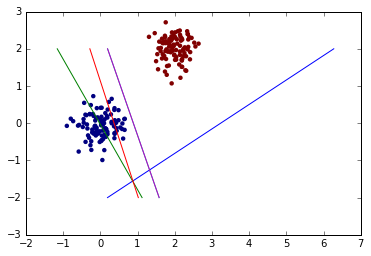

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import textwrap
import time
%matplotlib inline

def generateMVNRandData(Npts, mu, sigma):
	data  = np.random.multivariate_normal(mu, sigma*np.eye(len(mu)), Npts)
	return data

def plotLine(weights, range):
	x = np.array(range)
	y = -(weights[0]/weights[1])-(weights[2]/weights[1])*x
	plt.plot(y,x)
	plt.pause(2)

def perceptronLearningAlg(data,labels,eta,nIterations):
	nPts = data.shape[0]
	weights = np.random.rand(data.shape[1])
	print('Initial weights:', weights)

	error = 1;
	iter = 0;
	while(error > 0 & iter < nIterations):
		print('Iteration: ', iter,'; Error: ', error)
		error = 0
		iter += 1
		for i in range(nPts):
			activation =  data[i,:]@weights
			activation = (activation>0)
			if (activation-labels[i])!=0:
				weights-=eta*data[i,:]*(activation-labels[i])
				error += 1
				plotLine(weights, [-2,2])

	plotLine(weights, [-2,2])
	print('Final Iteration: ', iter,'; Final Error: ', error)
	return weights


Npts  = 100
mu1   = [2,2]
mu2   = [0,0]
var   = .1
eta   = 10
nIterations = 10;

fig   = plt.figure()

data1 = np.array(generateMVNRandData(Npts, mu1, .1))
data1 = np.hstack((np.ones((Npts,1)),data1))
data2 = np.array(generateMVNRandData(Npts, mu2, .1))
data2 = np.hstack((np.ones((Npts,1)),data2))

data  = np.vstack(( data1, data2))
labels= np.hstack((np.ones(Npts), np.zeros(Npts)))

plt.scatter(data[:,1],data[:,2], c=labels, linewidth=0)
plt.pause(2)

perceptronLearningAlg(data,labels,eta,nIterations)

Questions to consider: 
* How does the learning behavior change with changes in $\eta$? as $\eta$ increases? as $\eta$ decreases? 
* How would you generate overlapping classes using the provided code? Explain your answer. (Only change parameters.  You do not need to change code. )  
* What happens to the learning behavior when you have overlapping classes? 
* The implementation provided uses \{0,1\} labels whereas the psuedo-code above uses \{-1,1\}.  How does the code need to change to account for this difference (i.e., suppose you want to use \{-1,1\} labels.  What would you need to change in the code?) Why?
* In the provided code, there is not a separate line for learning the bias $b$as in the psuedo-code above.  How is it being estimated and represented it in the code (... the code IS still learning the bias value). 